In [1]:
import numpy as np

In [2]:
def f1(x):
    return x[0]**2+x[1]**2
def grad_f1(x):
    return np.array([2*x[0],2*x[1]])

def f2(x):
    return x[0]**2*(4-2.1*x[0]**2+1/3*x[0]**4) + x[0]*x[1] + x[1]**2*(-4+4*x[1]**2)
def grad_f2(x):
    return np.array([8*x[0]-8.4*x[0]**3+2*x[0]**5+x[1],x[0]-8*x[1]+16*x[1]**3])
def hessian_f2(x):
    return np.array([[8 -25.2*x[0]**2+10*x[0]**4,1],[1,-8 + 48*x[1]**2]])

def rosenbrock(x,a=1,b=100):
    return (a-x[0])**2 + b*(x[1]-x[0]**2)**2
def grad_rosenbrock(x,a=1,b=100):
    return np.array([ 2*(x[0]-a) + b*2*(x[0]**2-x[1])*2*x[0], 2*b*(x[1]-x[0]**2) ])
def hessian_rosenbrock(x,a=1,b=100):
    return np.array([[2-400 * x[1] + 1200 * x[0]**2 , -400 *x[0]], [-400*x[0],  200]])

def f3(x):
    return 100*x[0]**2 + x[1]**2
def grad_f3(x):
    return np.array([ 200*x[0], 2*x[1] ])
def hessian_f3(x):
    return np.array([ [ 200, 0] ,[ 0,2] ])

In [3]:
#GRADIENT DESCENT WITH FIXED ALPHA AND STEP
def grad_descent(f,grad_f,x0,alfa=0.1,epsilon=1e-15):
    max_iter = 100
    x_list = []
    grad_list = []
    x = x0
    z1 = f(x)
    for i in range(max_iter):
        gradx = grad_f(x)
        x = x - alfa*gradx
        x_list.append(x)
        grad_list.append(gradx)
        z2 = f(x)
        if abs(z2-z1)<= epsilon:
            print(abs(z2-z1), i)
            return x, np.array(x_list), np.array(grad_list)
        if i == max_iter-1:
            print(abs(z2-z1)) 
        z1 = z2
        
    return x, np.array(x_list), np.array(grad_list)

In [129]:
#GRADIENT DESCENT WITH ADAPTATIVE ALPHA AND FIXED STEP
def grad_descent2(f,grad_f,x0,fdif_threshold = 1e-20,grad_threshold = 1e-20,alfa_threshold = 1e-20):

    x1 = x0
    f1 = f(x1)
    
    x_list= []
    x_list.append(x1)
    gradf_list = []
    
    loop_out = True
    loop_alfa = True
    j=0
    print ('x0:',x1,'f1:',f1,end = ' ')
    while loop_out:
        j=j+1
        gradf = grad_f(x1)
        gradf_list.append(gradf)
        if np.linalg.norm(gradf) <= grad_threshold:
            print('grad_threshold:', np.linalg.norm(gradf),'x2:',x2,'loops:',j)
            return x2, np.array(x_list), np.array(gradf_list)
        
        alfa = 1.0
        i=0
        while loop_alfa:
            i=i+1
            if alfa < alfa_threshold:
                x_list.append(x2)
                print('alfa_threshold:',alfa,'x2:',x2,'inner loops:',i,'outer loops:',j)
                return x2, np.array(x_list), np.array(gradf_list)
            else:
                x2 = x1 - alfa*gradf
                f2 = f(x2)
                if f2 < f1:
                    loop_alfa = False
                else:
                    alfa = alfa/2
        loop_alfa = True  
        x_list.append(x2)
        if abs(f2-f1) <= fdif_threshold:
            print('fdif_threshold:',abs(f2-f1),'x2:',x2,'loops:',j)
            return x2, np.array(x_list), np.array(gradf_list)

        x1 = x2
        f1 = f2

In [130]:
#NEWTON DESCENT WITH ADAPTATIVE STEP
def newton_descent(f,grad_f,hessian_f,x0):

    x1 = x0
    f1 = f(x1)

    x_list= []
    x_list.append(x1)
    gradf_list = []

    fdif_threshold = 1e-20
    grad_threshold = 1e-20
    alfa_threshold = 1e-20

    loop_out = True
    loop_alfa = True
    j=0
    print ('x0:',x1,'f1:',f1,end = ' ')
    while loop_out:
        j=j+1
        gradf = grad_f(x1)
        gradf_list.append(gradf)
        if np.linalg.norm(gradf) <= grad_threshold:
            print('grad_threshold:', np.linalg.norm(gradf),'x2:',x2,'loops:',j)
            return x2, np.array(x_list), np.array(gradf_list)

        alfa = 1.0
        i=0
        while loop_alfa:
            i=i+1
            if alfa < alfa_threshold:
                x_list.append(x2)
                print('alfa_threshold:',alfa,'x2:',x2,'inner loops:',i,'outer loops:',j)
                return x2, np.array(x_list), np.array(gradf_list)
            else:
                hessian = hessian_f(x1)
                d = np.linalg.solve(hessian,gradf)
                x2 = x1 - alfa*d
                f2 = f(x2)
                if f2 < f1:
                    loop_alfa = False
                else:
                    alfa = alfa/2
        loop_alfa = True 
        x_list.append(x2)
        if abs(f2-f1) <= fdif_threshold:
            print('fdif_threshold:',abs(f2-f1),'x2:',x2,'loops:',j)
            return x2, np.array(x_list), np.array(gradf_list)
        x1 = x2
        f1 = f2

In [132]:
#NEWTON-GRADIENT DESCENT MIX
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

def newton_descent2(f,grad_f,hessian_f,x0):
    method_list = []
    x1 = x0
    f1 = f(x1)

    x_list= []
    x_list.append(x1)
    gradf_list = []

    fdif_threshold = 1e-20
    grad_threshold = 1e-20
    alfa_threshold = 1e-20

    loop_out = True
    loop_alfa = True
    j=0
    print ('x0:',x1,'f1:',f1,end = ' ')
    while loop_out:
        j=j+1
        gradf = grad_f(x1)
        gradf_list.append(gradf)
        if np.linalg.norm(gradf) <= grad_threshold:
            print('grad_threshold:', np.linalg.norm(gradf),'x2:',x2,'loops:',j)
            return x2, np.array(x_list), np.array(gradf_list), method_list

        alfa = 1.0
        i=0
        method = "G"
        while loop_alfa:
            i=i+1
            if alfa < alfa_threshold:
                x_list.append(x2)
                print('alfa_threshold:',alfa,'x2:',x2,'inner loops:',i,'outer loops:',j)
                return x2, np.array(x_list), np.array(gradf_list),  method_list
            else:
                hessian = hessian_f(x1)
                if is_pos_def(hessian):
                    step = np.linalg.solve(hessian,gradf)
                    method = "N"
                else:
                    step = gradf
                    method = "G"
                x2 = x1 - alfa*step
                f2 = f(x2)
                if f2 < f1:
                    loop_alfa = False
                else:
                    alfa = alfa/2
        loop_alfa = True 
        x_list.append(x2)
        method_list.append(method)
        if abs(f2-f1) <= fdif_threshold:
            print('fdif_threshold:',abs(f2-f1),'x2:',x2,'loops:',j)
            return x2, np.array(x_list), np.array(gradf_list), method_list
        x1 = x2
        f1 = f2

# 1 Gradient Descent Methods

## 1.1 A simple quadratic function

In [7]:
x0 = 4*np.random.rand(2)-np.array([2,2])
x0

array([ 0.99155292, -1.65732755])

In [34]:
x_1, x_list_1,_ = grad_descent(f1,grad_f1,x0)


6.754052230141083e-16 78


In [56]:
paths = []
for i in range(10):
    x0 = 4*np.random.rand(2)-np.array([2,2])
    x, x_list,_ = grad_descent(f1,grad_f1,x0)
    paths.append(x_list)

x, x_list,_ = grad_descent(f1,grad_f1,x0, alfa =1.0001)
paths.append(x_list)
x, x_list,_ = grad_descent(f1,grad_f1,x0, alfa =2)
paths.append(x_list)

9.081042135566036e-16 75
8.739932740356756e-16 77
9.160063166079044e-16 78
8.998438193991721e-16 78
9.434353380864509e-16 78
7.410560991743925e-16 70
6.764611012500729e-16 80
7.408115691417566e-16 78
8.93024403515501e-16 78
8.702413942908885e-16 76
0.000540703242864149
3.067309750936153e+95


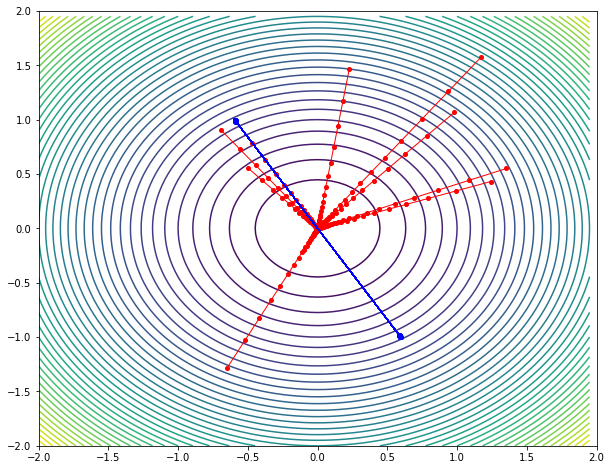

In [58]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Function to analyze

X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D

plt.figure(figsize=(10,8))
plt.contour(X, Y, Z, 50)

bottom = -2
top = 2
plt.ylim((bottom, top))
plt.xlim((bottom, top))
# Compute gradient 

X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
gradx = 2 * X
grady = 2 * Y 
for p in paths[:-2]:
    plt.plot(p[:,0],p[:,1],'ro-', markersize =4,linewidth=1 )

plt.plot(paths[-2][:,0],paths[-2][:,1],'bo-', markersize =4,linewidth=1 )
#plt.plot(paths[-1][:,0],paths[-1][:,1],'go-', markersize =4,linewidth=1 )
#plt.streamplot(x_list_1[:,0], x_list_1[:,1], grad_list_1[:,0], grad_list_1[:,1])

plt.show()

## 1.2 The exercise of lab 1

In [11]:
x_2, x_list_2, grad_list_2 = grad_descent(f1,grad_f1,x0)

6.549663813321835e-16 79


In [85]:
paths = []
for i in range(10):
    x0 = 4*np.random.rand(2)-np.array([2,2])
    print(x0)
    x, x_list,_ = grad_descent(f2,grad_f2,x0,alfa=0.01)
    paths.append(x_list)

[-1.88792669 -0.52852303]
2.0798434086088946e-09
[-0.39617749 -0.4483439 ]
2.1698589591778727e-08
[0.32971641 0.64735469]
1.314337949587241e-08
[ 1.15349843 -0.58342997]
1.0451639553821224e-12
[ 1.88259858 -1.88082161]
7.771561172376096e-16 79
[-1.49852445 -0.22926578]
0.00017488776916785298
[-0.54558891 -1.12255525]
3.0512396831383626e-08
[ 1.38690196 -0.12444373]
6.661338147750939e-16 93
[-1.54037134 -0.33893811]
1.452948716895719e-07
[0.63411766 1.9183797 ]
4.3642837788127053e-08


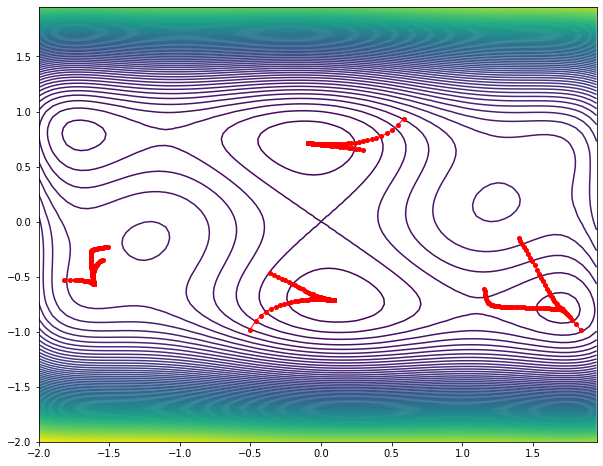

In [86]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Function to analyze

X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =  X**2*(4-2.1*X**2+1/3*X**4) + X*Y + Y**2*(-4+4*Y**2)

# Contour plot en 2D

plt.figure(figsize=(10,8))
plt.contour(X, Y, Z, 100)

# Compute gradient 

X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
#gradx = 2 * X
#grady = 2 * Y 
for p in paths:
    plt.plot(p[:,0],p[:,1],'ro-', markersize =4,linewidth=1 )

#plt.scatter(x_list_2[:,0],x_list_2[:,1])
#plt.streamplot(x_list[:,0], x_list[:,1], grad_list[:,0], grad_list[:,1])

plt.show()

In [89]:
paths = []
for i in range(3):
    x0 = 4*np.random.rand(2)-np.array([2,2])
    print(x0)
    x, x_list,_ = grad_descent2(f2,grad_f2,x0)
    paths.append(x_list)



[-1.59268562  0.01256568]
x0: [-1.59268562  0.01256568] f1: 2.0540804213536417 alfa_threshold: 6.776263578034403e-21 x2: [-0.08984201  0.7126564 ] inner loops: 68 outer loops: 15
[ 1.47224984 -1.86426237]
x0: [ 1.47224984 -1.86426237] f1: 33.867545962873294 alfa_threshold: 6.776263578034403e-21 x2: [ 1.70360671 -0.79608357] inner loops: 68 outer loops: 26
[-0.71226535 -1.20308606]
x0: [-0.71226535 -1.20308606] f1: 4.979628446301293 alfa_threshold: 6.776263578034403e-21 x2: [ 0.08984201 -0.7126564 ] inner loops: 68 outer loops: 15


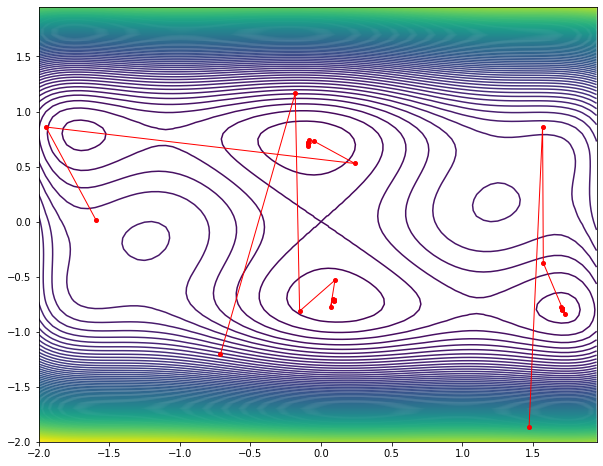

In [90]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Function to analyze

X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =  X**2*(4-2.1*X**2+1/3*X**4) + X*Y + Y**2*(-4+4*Y**2)

# Contour plot en 2D

plt.figure(figsize=(10,8))
plt.contour(X, Y, Z, 100)

# Compute gradient 

X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
#gradx = 2 * X
#grady = 2 * Y 
for p in paths:
    plt.plot(p[:,0],p[:,1],'ro-', markersize =4,linewidth=1 )

#plt.scatter(x_list_2[:,0],x_list_2[:,1])
#plt.streamplot(x_list[:,0], x_list[:,1], grad_list[:,0], grad_list[:,1])

plt.show()

In [15]:
x_list_3

array([[ 0.7811057 , -0.23399884],
       [ 0.13281247, -0.8460221 ],
       [ 0.12050737, -0.67179074],
       [ 0.085805  , -0.75228282],
       [ 0.09025126, -0.70804805],
       [ 0.08976382, -0.7127456 ],
       [ 0.08985118, -0.71255318],
       [ 0.08984026, -0.71265939],
       [ 0.0898413 , -0.71265622],
       [ 0.08984197, -0.7126565 ],
       [ 0.089842  , -0.7126564 ],
       [ 0.08984201, -0.71265641],
       [ 0.08984201, -0.7126564 ],
       [ 0.08984201, -0.7126564 ]])

## 1.3 The Rosenbrock function

In [167]:
paths = []

x0_list_rosen = [ 4*np.random.rand(2)-np.array([2,2]) for _ in range(10)]
for x0 in x0_list_rosen:
    x, x_list,_ = grad_descent2(rosenbrock,grad_rosenbrock,x0)
    paths.append(x_list)

x0: [-0.48249313  0.19270523] f1: 2.3585419175146995 fdif_threshold: 1.852953025129402e-21 x2: [0.99999996 0.99999991] loops: 18391
x0: [-0.09216057 -0.45527524] f1: 22.700966137062633 fdif_threshold: 8.311536730510018e-21 x2: [0.99999998 0.99999996] loops: 19107
x0: [-0.22789039  1.20390247] f1: 134.21084432065814 fdif_threshold: 5.753799136123798e-21 x2: [0.99999995 0.99999989] loops: 18117
x0: [-1.82022933  0.5270603 ] f1: 784.2305354440555 fdif_threshold: 2.8275528484384177e-21 x2: [0.99999996 0.99999993] loops: 18544
x0: [1.30658845 1.52344361] f1: 3.4696594029254495 fdif_threshold: 9.556490638918112e-21 x2: [1.00000002 1.00000005] loops: 18448
x0: [0.80328149 1.93322297] f1: 165.9232608997684 fdif_threshold: 8.219712073312252e-21 x2: [1.00000002 1.00000004] loops: 21822
x0: [-1.8843556   1.74761486] f1: 333.46573999511907 fdif_threshold: 1.1281278766740047e-21 x2: [1.00000005 1.00000009] loops: 20256
x0: [-1.71134661  0.04010616] f1: 841.7530113642636 fdif_threshold: 4.4935052631

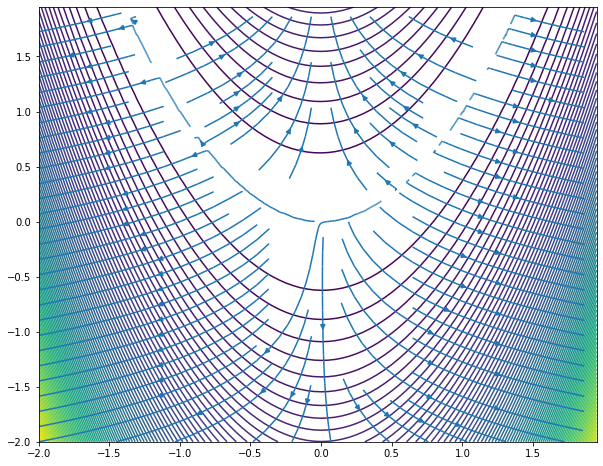

In [161]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Function to analyze

X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =  (1-X)**2 + 100*(Y-X**2)**2

# Contour plot en 2D

plt.figure(figsize=(10,8))
plt.contour(X, Y, Z, 100)

# Compute gradient 

X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)

a=1
b=100
gradx = 2*(X-a) + b*2*(X**2-Y)*2*X
grady = 2*b*(Y-X**2)
for p in paths:
    plt.plot(p[:,0],p[:,1],'ro-', markersize =4,linewidth=1 )

plt.streamplot(X,Y, gradx, grady)

plt.show()

# 2 Newton Descent Method

## 2.1 A Simple Quadratic Function

In [165]:
x0_list =[ 4*np.random.rand(2)-np.array([2,2]) for _ in range(10)]

In [164]:
paths_gd = []
paths_nw = []

for x0 in x0_list:
    x, x_list, _ = grad_descent2(f3,grad_f3,x0)
    paths_gd.append(x_list)
    x, x_list,_ = newton_descent(f3,grad_f3,hessian_f3,x0)
    paths_nw.append(x_list)
    

x0: [-0.60362249  0.57546928] f1: 36.76717546297398 fdif_threshold: 4.2255611692327575e-21 x2: [3.65539886e-11 1.28503342e-09] loops: 891
x0: [-0.60362249  0.57546928] f1: 36.76717546297398 grad_threshold: 0.0 x2: [0. 0.] loops: 2
x0: [0.50934355 1.77863087] f1: 29.106612656855543 fdif_threshold: 7.113934487828406e-21 x2: [3.32744944e-11 1.19306698e-09] loops: 944
x0: [0.50934355 1.77863087] f1: 29.106612656855543 grad_threshold: 0.0 x2: [0. 0.] loops: 2
x0: [-0.76910645  0.02773847] f1: 59.153242095947284 fdif_threshold: 4.4275645507335544e-21 x2: [5.09203949e-11 1.77393098e-09] loops: 743
x0: [-0.76910645  0.02773847] f1: 59.153242095947284 grad_threshold: 0.0 x2: [0. 0.] loops: 2
x0: [0.99771926 1.85248796] f1: 102.9760845321609 fdif_threshold: 5.604401539938611e-21 x2: [2.27493687e-11 8.36724978e-10] loops: 962
x0: [0.99771926 1.85248796] f1: 102.9760845321609 grad_threshold: 0.0 x2: [0. 0.] loops: 2
x0: [-0.02665315  1.95034077] f1: 3.8748681586522578 fdif_threshold: 7.42965386263

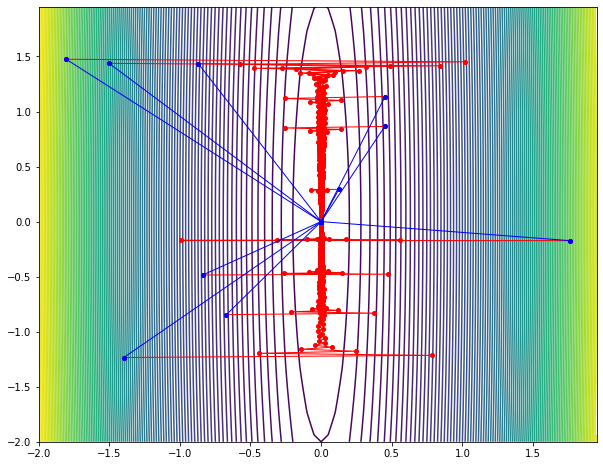

In [118]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Function to analyze

X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =  100 * X**2 + Y**2

# Contour plot en 2D

plt.figure(figsize=(10,8))
plt.contour(X, Y, Z, 100)

# Compute gradient 

X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
#gradx = 2 * X
#grady = 2 * Y 
for p in paths_gd:
    plt.plot(p[:,0],p[:,1],'ro-', markersize =4,linewidth=1 )

for p in paths_nw:
    plt.plot(p[:,0],p[:,1],'bo-', markersize =4,linewidth=1 )

#plt.scatter(x_list_2[:,0],x_list_2[:,1])
#plt.streamplot(x_list[:,0], x_list[:,1], grad_list[:,0], grad_list[:,1])

plt.show()

In [120]:
for gd,nw in zip(paths_gd, paths_nw):
    print("****")
    print("Steps GD", len(gd) -1 )
    print("Steps Newton ", len(nw) -1)
    

****
Steps GD 943
Steps Newton  1
****
Steps GD 863
Steps Newton  1
****
Steps GD 746
Steps Newton  1
****
Steps GD 909
Steps Newton  1
****
Steps GD 917
Steps Newton  1
****
Steps GD 935
Steps Newton  2
****
Steps GD 920
Steps Newton  1
****
Steps GD 915
Steps Newton  1
****
Steps GD 937
Steps Newton  1
****
Steps GD 851
Steps Newton  1


## 2.2 The Exercise of Lab 1

In [157]:
paths_gd = []
paths_nw = []
paths_mix =[]
methods_list =[]
x0_list =[ 4*np.random.rand(2)-np.array([2,2]) for _ in range(4)]
for x0 in x0_list:
    x, x_list, _ = grad_descent2(f2,grad_f2,x0)
    paths_gd.append(x_list)
    x, x_list,_ = newton_descent(f2,grad_f2,hessian_f2,x0)
    paths_nw.append(x_list)
    x, x_list,_, methods = newton_descent2(f2,grad_f2,hessian_f2,x0)
    paths_mix.append(x_list)
    methods_list.append(methods)

x0: [ 0.05624241 -0.5026902 ] f1: -0.771006436432674 alfa_threshold: 6.776263578034403e-21 x2: [ 0.08984202 -0.7126564 ] inner loops: 68 outer loops: 13
x0: [ 0.05624241 -0.5026902 ] f1: -0.771006436432674 alfa_threshold: 6.776263578034403e-21 x2: [ 0.08984201 -0.7126564 ] inner loops: 68 outer loops: 6
x0: [ 0.05624241 -0.5026902 ] f1: -0.771006436432674 alfa_threshold: 6.776263578034403e-21 x2: [ 0.08984201 -0.7126564 ] inner loops: 68 outer loops: 6
x0: [ 0.00233406 -1.63055667] f1: 17.63641893715944 alfa_threshold: 6.776263578034403e-21 x2: [-0.08984202  0.7126564 ] inner loops: 68 outer loops: 13
x0: [ 0.00233406 -1.63055667] f1: 17.63641893715944 alfa_threshold: 6.776263578034403e-21 x2: [ 0.08984201 -0.7126564 ] inner loops: 68 outer loops: 7
x0: [ 0.00233406 -1.63055667] f1: 17.63641893715944 alfa_threshold: 6.776263578034403e-21 x2: [ 0.08984201 -0.7126564 ] inner loops: 68 outer loops: 7
x0: [-0.97403499  1.72463922] f1: 23.999768864138467 alfa_threshold: 6.776263578034403e-2

In [154]:
x0_list

[array([-1.78178614, -1.95025321]), array([0.91544778, 0.887988  ])]

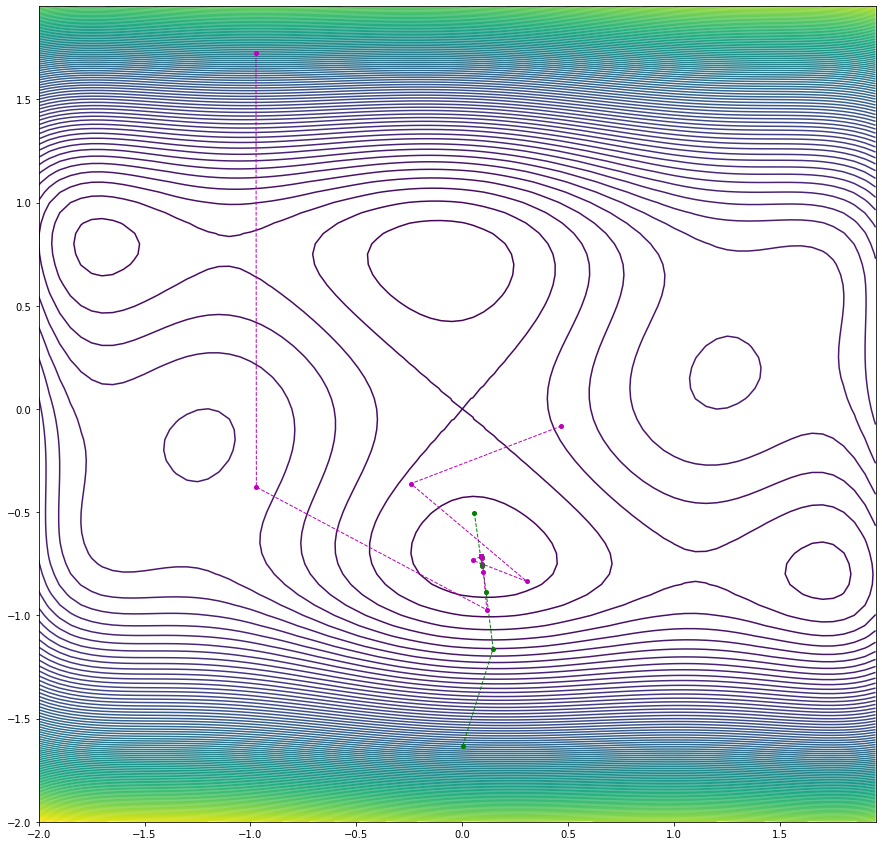

In [158]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Function to analyze

X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =  X**2*(4-2.1*X**2+1/3*X**4) + X*Y + Y**2*(-4+4*Y**2)

# Contour plot en 2D

plt.figure(figsize=(15,15))
plt.contour(X, Y, Z, 100)

# Compute gradient 

X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
#gradx = 2 * X
#grady = 2 * Y 
#for p in paths_gd:
    #plt.plot(p[:,0],p[:,1],'ro--', markersize =4,linewidth=1 )

#for p in paths_nw:
    #plt.plot(p[:,0],p[:,1],'bo-', markersize =4,linewidth=1 )
    
for p,m in zip(paths_mix, methods):
    c = "g" if m=="G" else "m"
    plt.plot(p[:,0],p[:,1],'{}o--'.format(c), markersize =4,linewidth=1 )

#plt.scatter(x_list_2[:,0],x_list_2[:,1])
#plt.streamplot(x_list[:,0], x_list[:,1], grad_list[:,0], grad_list[:,1])

plt.show()

In [152]:
for gd,nw, m in zip(paths_gd, paths_nw, paths_mix):
    print("****")
    print("Steps GD", len(gd) -1 )
    print("Steps Newton ", len(nw) -1)
    print("Mixed Newton/Gradient", len(m) -1)
    

****
Steps GD 17
Steps Newton  9
Mixed Newton/Gradient 9
****
Steps GD 14
Steps Newton  1
Mixed Newton/Gradient 7


## 2.3 The Rosenbrock function

In [170]:
paths_gd = []
paths_nw = []
for x0 in x0_list_rosen:
    x, x_list,_ = grad_descent2(rosenbrock,grad_rosenbrock,x0)
    paths_gd.append(x_list)
    x, x_list,_ = newton_descent(rosenbrock,grad_rosenbrock,hessian_rosenbrock, x0)
    paths_nw.append(x_list)

x0: [-0.48249313  0.19270523] f1: 2.3585419175146995 fdif_threshold: 1.852953025129402e-21 x2: [0.99999996 0.99999991] loops: 18391
x0: [-0.48249313  0.19270523] f1: 2.3585419175146995 fdif_threshold: 7.072581749565558e-27 x2: [1. 1.] loops: 18
x0: [-0.09216057 -0.45527524] f1: 22.700966137062633 fdif_threshold: 8.311536730510018e-21 x2: [0.99999998 0.99999996] loops: 19107
x0: [-0.09216057 -0.45527524] f1: 22.700966137062633 grad_threshold: 0.0 x2: [1. 1.] loops: 17
x0: [-0.22789039  1.20390247] f1: 134.21084432065814 fdif_threshold: 5.753799136123798e-21 x2: [0.99999995 0.99999989] loops: 18117
x0: [-0.22789039  1.20390247] f1: 134.21084432065814 fdif_threshold: 9.691402739673012e-24 x2: [1. 1.] loops: 17
x0: [-1.82022933  0.5270603 ] f1: 784.2305354440555 fdif_threshold: 2.8275528484384177e-21 x2: [0.99999996 0.99999993] loops: 18544
x0: [-1.82022933  0.5270603 ] f1: 784.2305354440555 fdif_threshold: 1.2449211160519093e-30 x2: [1. 1.] loops: 26
x0: [1.30658845 1.52344361] f1: 3.4696

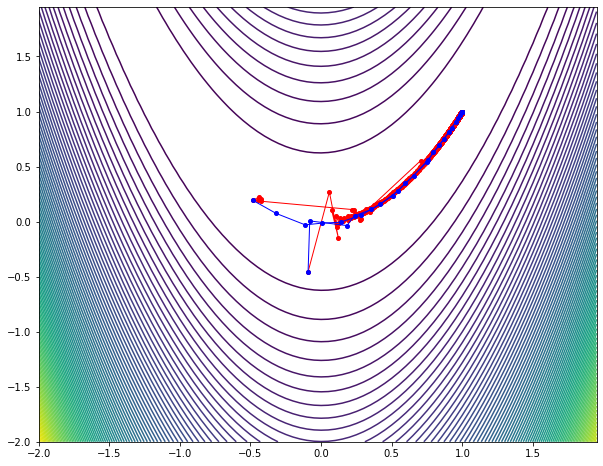

In [172]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Function to analyze

X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =  (1-X)**2 + 100*(Y-X**2)**2

# Contour plot en 2D

plt.figure(figsize=(10,8))
plt.contour(X, Y, Z, 100)

# Compute gradient 

X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)

a=1
b=100
gradx = 2*(X-a) + b*2*(X**2-Y)*2*X
grady = 2*b*(Y-X**2)

for p in paths_gd[:2]:
    plt.plot(p[:,0],p[:,1],'ro-', markersize =4,linewidth=1 )
    
for p in paths_nw[:2]:
    plt.plot(p[:,0],p[:,1],'bo-', markersize =4,linewidth=1 )

#plt.streamplot(X,Y, gradx, grady)

plt.show()

In [173]:
for gd,nw in zip(paths_gd, paths_nw):
    print("****")
    print("Steps GD", len(gd) -1 )
    print("Steps Newton ", len(nw) -1)

****
Steps GD 18391
Steps Newton  18
****
Steps GD 19107
Steps Newton  16
****
Steps GD 18117
Steps Newton  17
****
Steps GD 18544
Steps Newton  26
****
Steps GD 18448
Steps Newton  9
****
Steps GD 21822
Steps Newton  9
****
Steps GD 20256
Steps Newton  26
****
Steps GD 17428
Steps Newton  24
****
Steps GD 18601
Steps Newton  21
****
Steps GD 16708
Steps Newton  15
